# **Deep Neural Network Project - Bank Churn Prediction**

**Context**

Banks providing various services worry about the problem of 'Churn' meaning customers leaving and joining another service provider. Bank needs to know what aspects of the service influence a customer's decision to stay or exit the bank so management can concentrate efforts on the improvement of service by keeping these priorities in mind.


**Objective**

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

**Data Dictionary**

CustomerId: Unique ID which is assigned to each customer

Surname: Last name of the customer 

CreditScore: It defines the credit history of the customer.  

Geography: A customer’s location    

Gender: It defines the Gender of the customer   

Age: Age of the customer     

Tenure: Number of years for which the customer has been with the bank

NumOfProducts: It refers to the number of products that a customer has purchased through the bank.

Balance: Account balance

HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.

EstimatedSalary: Estimated salary 

isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )

Excited: It is a categorical variable that decides whether the customer left the bank within six months or not.

# **1. Loading Required Libraries and Importing Data**

In [1]:
# Importing libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import keras
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# to split the data into train and test
from sklearn.model_selection import train_test_split

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Library to split data
from sklearn.model_selection import train_test_split
# library to import to standardize the data
from sklearn.preprocessing import MinMaxScaler
# importing tensorflow
import tensorflow as tf
# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
# To get classification report
from sklearn.metrics import classification_report
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import backend

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

from tensorflow import keras

from sklearn.metrics import roc_curve
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import layers

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from matplotlib import pyplot
import random

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Create DataFrame 'chn' by importing 'Churn' file and make a copy of it just in case if need to revert back
chn = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Churn.csv')
chn_copy = chn.copy()

# **2. Exploring Data At High Level**

Check first 10 records to see the dataset at high level

In [4]:
chn.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


By looking at sample records, at a first glace data looks good and as per the data dictionary. 

Let's check few basic things to understand the dataset better.

In [5]:
# checking for dups
chn.duplicated().sum()

0

There are no duplicates

In [6]:
# checking rows and columns of dataframe
chn.shape

(10000, 14)

There are 10000 rows and 14 columns

In [7]:
# check datatypes and non null counts
chn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Looks like all the column datatypes as expected and there are no nulls in the dataset either. 

In [8]:
# check some stats of columns
chn.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


Few observations - 

1) Credit Score of customers varies between 350 to 850 with median and mean at around 650.  

2) Customers are divided into 3 geographical locations with maximum in France. 

3) The minimum Estimated salary is just 11.58, which doesn't look right and need to look into detail later. However, its around 51K at 25th percentile so looks good then and after. 

4) Balance has huge variations from 0 to 250K with average at 76K. 

**Pre EDA Data Pre Processing**

RowNumber, CustomerId and Surname can be dropped as they would not add any value in Modelling and would not be required for EDA as well. So it is better to drop at this point. 

In [9]:
# dropping ID column in original dataset
chn.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

Let's check the dataset one time.

In [10]:
chn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Looks good, let's do EDA.

# **3. Exploratory Data Analysis (EDA)**

### Univariate Analysis

Let's create function to find counts/percentage of columns with continuous values to understand the data better.

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")  # boxplot will be created and a star will indicate the mean value of the column
    
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

**CreditScore**

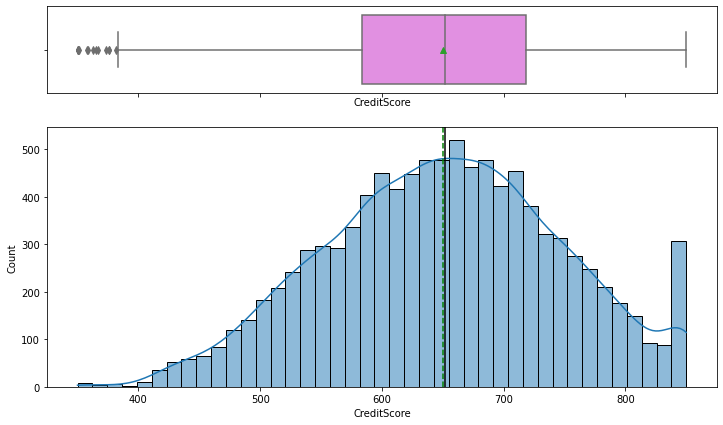

In [ ]:
histogram_boxplot(chn,'CreditScore',kde=True)

Credit Score is left skewed with big spike at the right most. It has some outliers on left also. Need to check those later. 

**Age**

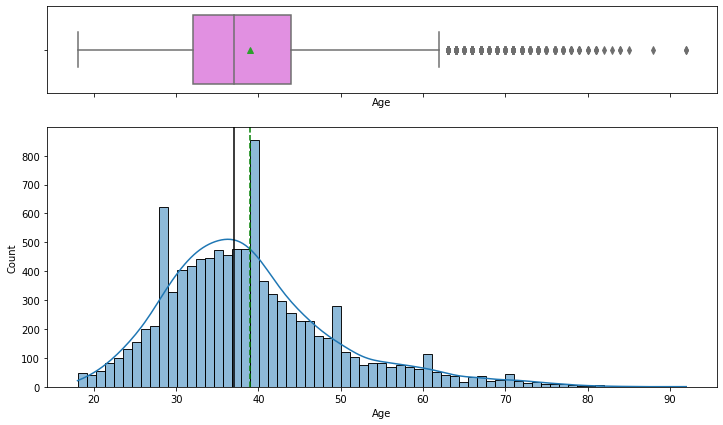

In [ ]:
histogram_boxplot(chn,'Age',kde=True)

Age is right skewed with many outliers on the right. 

**Tenure**

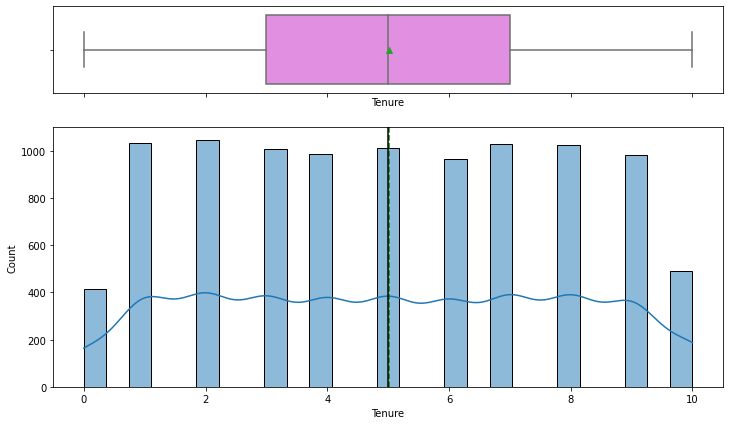

In [ ]:
histogram_boxplot(chn,'Tenure',kde=True)

Customers are kind of equally divided between 1 to 9 have median at 5.  0 and 10 have lesser customers. 

**EstimatedSalary**

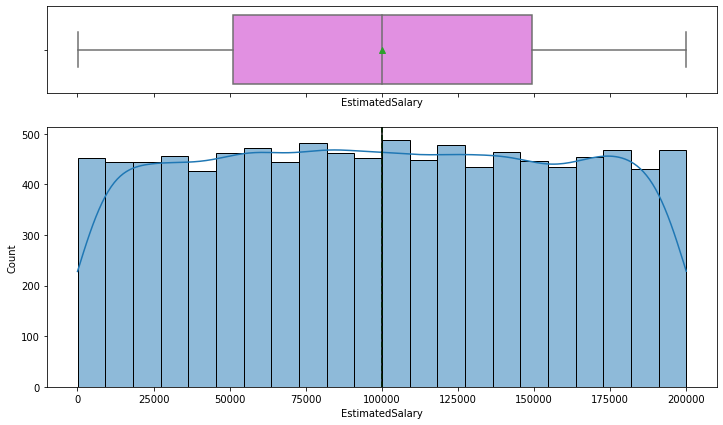

In [ ]:
histogram_boxplot(chn,'EstimatedSalary',kde=True)

It is kind of equally distributed across all ranges with median at 100k. Need to check records with minimum values though.

**Balance**

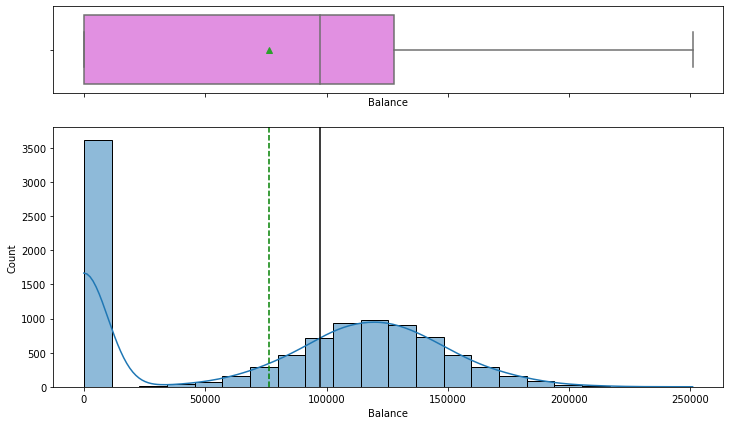

In [ ]:
histogram_boxplot(chn,'Balance',kde=True)

Balance is normally distributed if 0 is removed. There are quite a few records at 0. 

Rest of the integer columns are having handful of values. Let's create function to find counts/percentage for these columns and object columns to map their unique values to understand them better.

In [ ]:
# function to create labeled countplots

def labeled_countplot(data, feature, hue=None, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    if hue==None:
      ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
      )
    else: 
      ax = sns.countplot(
        data=data,
        x=feature,
        hue=hue,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
      )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

Let's map rest of the columns

**Geography**

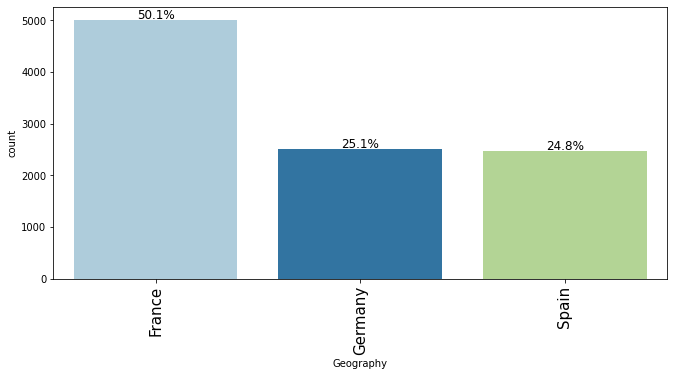

In [ ]:
labeled_countplot(chn,'Geography',perc=True, n=10)

No bad data. Majority customers are from France. Germany and Spain have almost similar number of customers. 

**Gender**

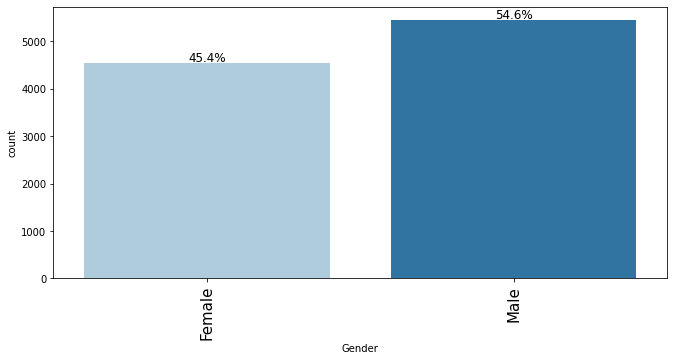

In [ ]:
labeled_countplot(chn,'Gender', perc=True,n=10)

No bad data. Male to Female ratio is not same but close. 

**NumOfProducts**

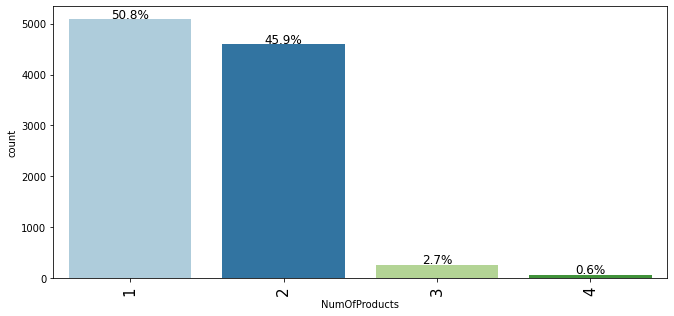

In [ ]:
labeled_countplot(chn,'NumOfProducts', perc=True, n=10)

No bad data. 51% customers bought only 1 product and 46% bought 2. Very few customers bought more than 2 products.  

**HasCrCard**

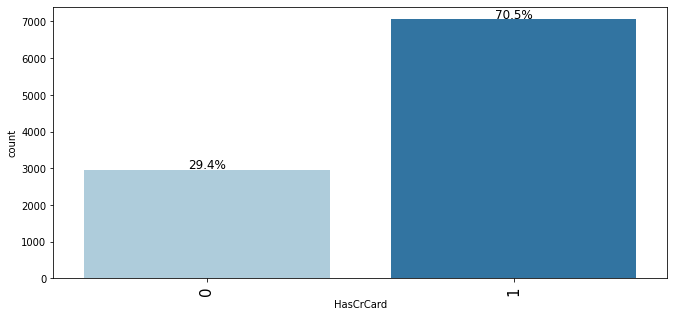

In [ ]:
labeled_countplot(chn,'HasCrCard', perc=True, n=10)

Around 70% customers have credit card. 

**IsActiveMember**

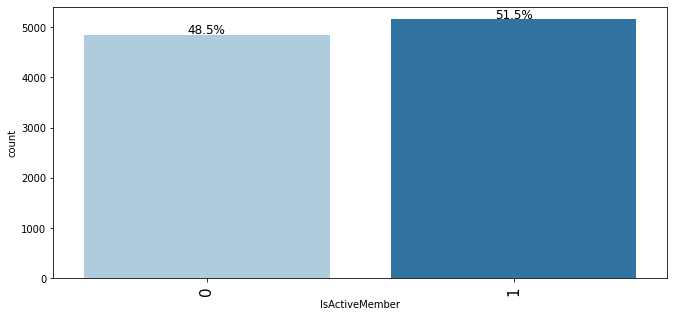

In [ ]:
labeled_countplot(chn,'IsActiveMember', perc=True, n=10)

Little less than half of the customers are inactive.

**Exited**

Exited is the target variable. Let's check how much data is balanced by checking the count and % of both the classes. 


0    7963
1    2037
Name: Exited, dtype: int64


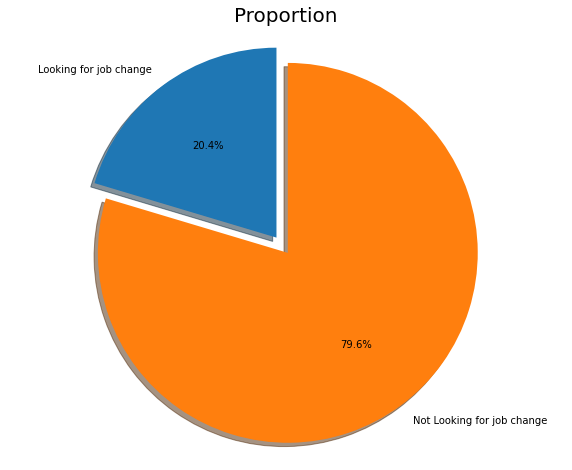

In [ ]:
# create a pie chart to see the difference in both the classes
print(chn.Exited.value_counts())
labels = 'Looking for job change', 'Not Looking for job change'
sizes = [chn.Exited[chn['Exited']==1].count(),chn.Exited[chn['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion", size = 20)
plt.show()

The pie chart shows the dataset is divided into 80-20 with 20% left the bank. The distribution of classes is imbalanced for the target variable which will bring unique challenges in comparison to performing classification over balanced target variables.

### Bivariate Analysis

Let's start by finding the correlations between different columns to get generic idea.

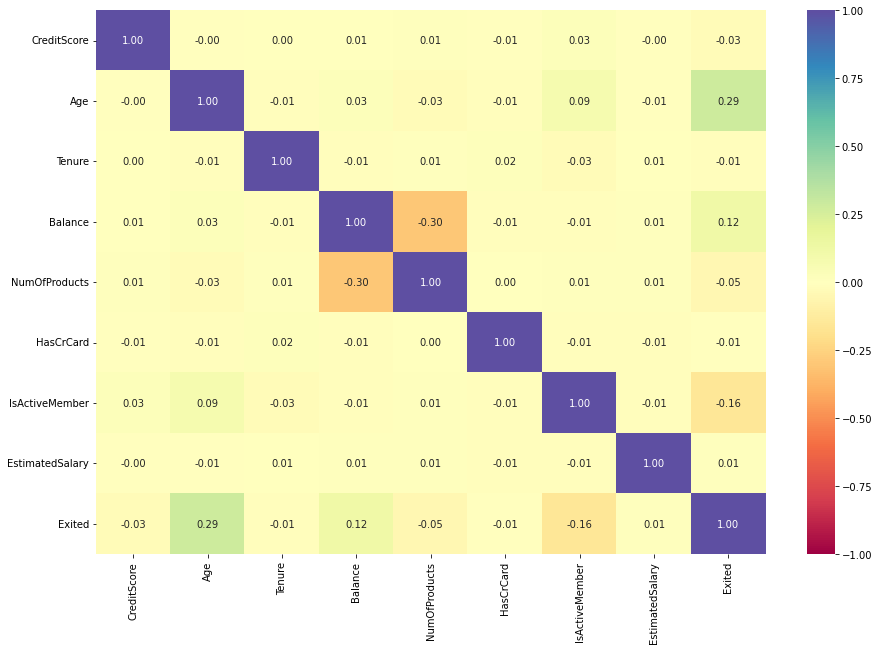

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    chn.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Few observations - 

1) Overall the features do not show much corelation among them. Highest correlation is between Balance and Numberofproducts, which is also negative. People using more products have less balance. 

2) Age and Exited count is positively correlated. Higher the age, the higher the chances of customers getting exited from the bank. 

3) Isactivemember is negatively correlated with exited count which makes sense, if customer is not been active much, chances are high that he/she would leave. 

Let's create a function that can be used to plot the distribution of all numberic fields with respect to exited value. 

In [ ]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for exited=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for exited=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

**CreditScore vs. Exited**

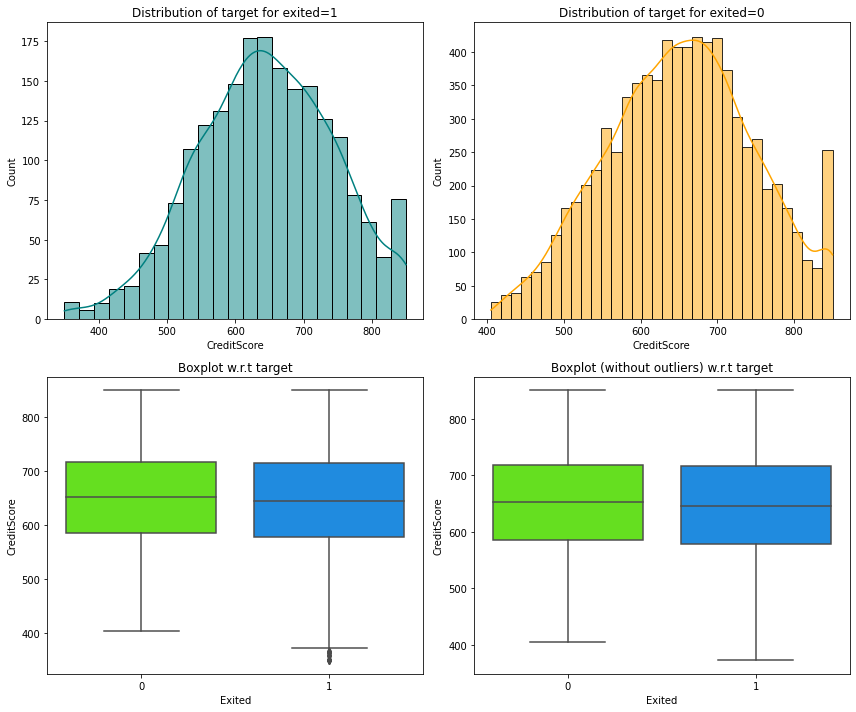

In [ ]:
distribution_plot_wrt_target(chn, "CreditScore", "Exited")

For both exited classes, the distribution of CreditScore is a bit left skewed. For exited = 0 class, meaning customers didn't leave the bank, there is a big spike in count at the highest credit score.

**Age vs. Exited**

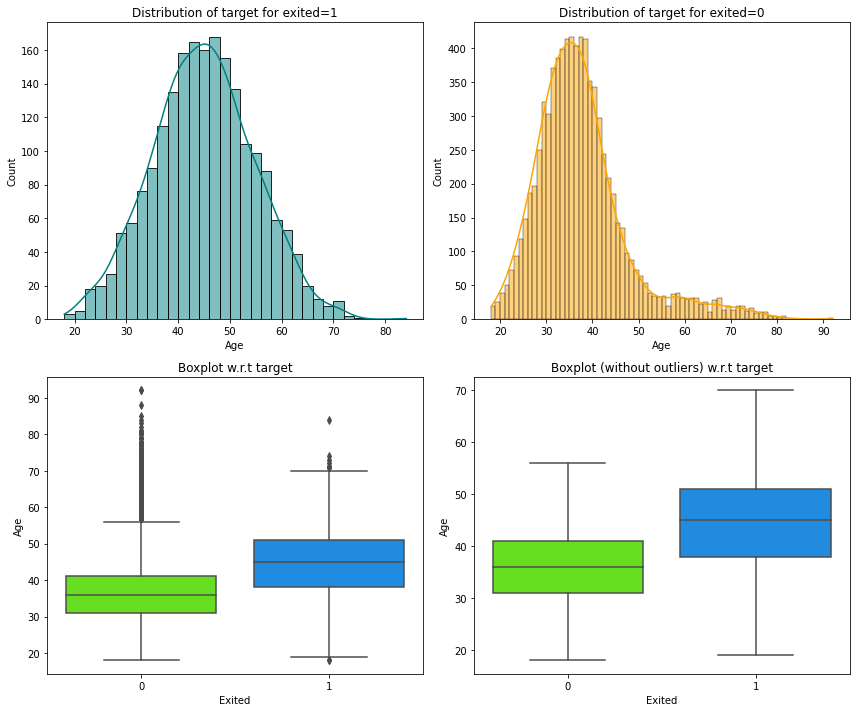

In [ ]:
distribution_plot_wrt_target(chn, "Age", "Exited")

For exited=1, the age is normally distributed but with exited=0, its right skewed. There are lot of outliers after right whisker with exited customers. Without outliers, the mean value is higher in exited customers compare to not exited customers. 

**Balance vs. Exited**

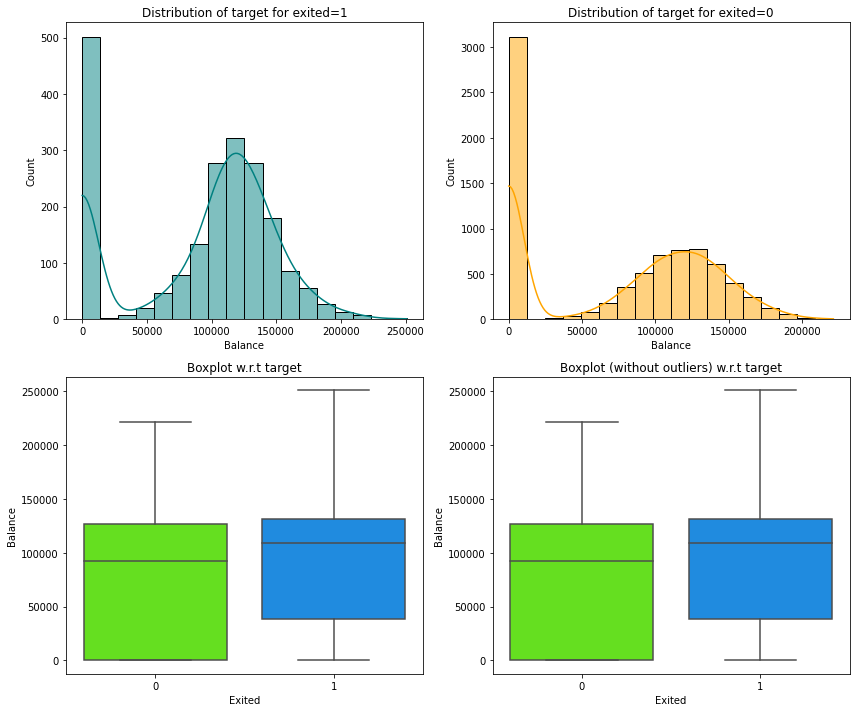

In [ ]:
distribution_plot_wrt_target(chn, "Balance", "Exited")

Balance distributions are almost same for exited = 0 or 1 customers with bit sharper curve with exited = 1 customers. 

**EstimatedSalary vs. Exited**

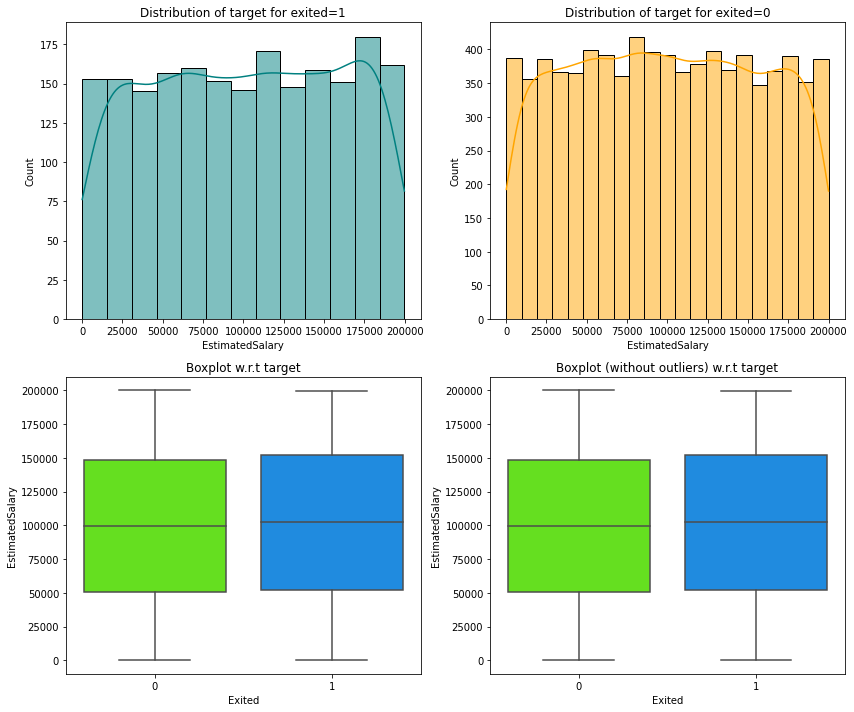

In [ ]:
distribution_plot_wrt_target(chn, "EstimatedSalary", "Exited")

EstimatedSalary is also have similar distributions for both the classes with mean value is around 100K. 

Let's create a function to check categorical, boolean and other fields with handful of values with respect to exited values. 

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Geography vs. Exited**

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


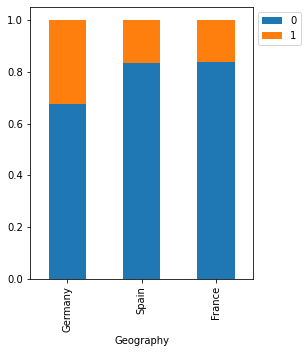

In [ ]:
stacked_barplot(chn, "Geography", "Exited")

Germany has the highest number of exited customers, count and % both. Spain and France both have kind of similar ratio. 

**Gender vs. Exited**

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


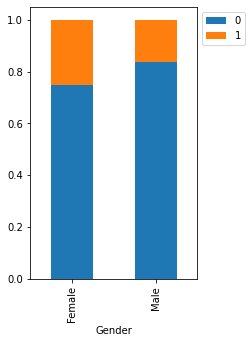

In [ ]:
stacked_barplot(chn, "Gender", "Exited")

Female customers tend to exit more compare to male customers. 

**Tenure vs. Exited**

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


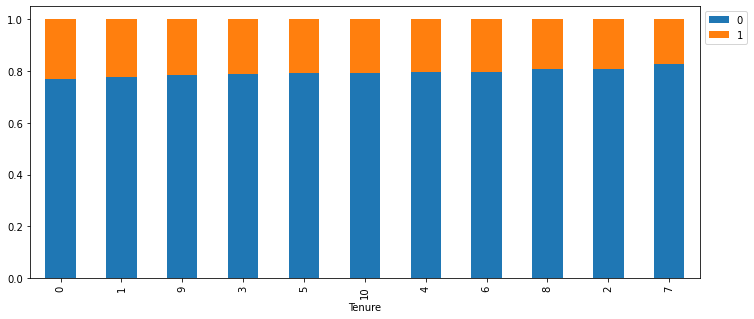

In [ ]:
stacked_barplot(chn, "Tenure", "Exited")

Tenure doesn't really affect the exited count. Tenure less than 3 have slight  higher rate in exiting count compare to others. 

**NumOfProducts vs. Exited**

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


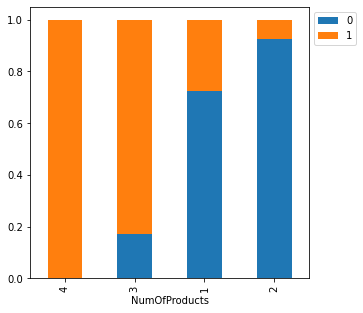

In [ ]:
stacked_barplot(chn, "NumOfProducts", "Exited")

All the customers having 4 products left the bank, which is very surprising. Customers with 3 products also have very high exit ratio. Customers with 2 products have the least exit ratio. 

**HasCrCard vs. Exited**

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


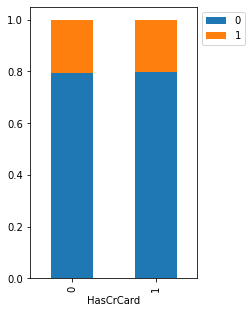

In [ ]:
stacked_barplot(chn, "HasCrCard", "Exited")

Having a Credit card or not doesn't make much difference in exit ratio.

**IsActiveMember vs. Exited**

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


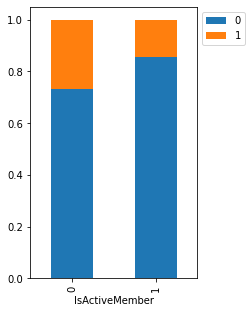

In [ ]:
stacked_barplot(chn, "IsActiveMember", "Exited")

Non-active customers left bank more in percentage compare to active customers. 

### Summary of Observations of EDA

Credit Score - customers are divided across different credit scores and left skewed. There is huge spike in number of customers at the highest end and there are oultiers before left whiskter. .

Age - It is right skewed and median is at 38 but many outliers after right whisker. Observed that aged customers tend to exited the bank more compare to younger. 

Tenure - it varies kind of evenly between 1 and 9. Do not have much impact on exited count.

Estimated Salary - it is kind of equally distributed in all ranges and doesn't have much impact on exited count. 

Balance - it is normally distributed if we do not count the customers with 0 balance. 

Geography - the customers are divided into 3 geographical locations with 50% in France. Germany has the highest exited count. 

Gender - the ratio of female and male is 45-55. However, more female customers exited the banks compare to male. 

Number of products - 97% of customers have 2 or 1 products. All customers with 4 products and almost all customers with 3 products exited the bank. 

Is Active Member - active vs. inactive customer ratio is very close and inactive customers exited bank more than active ones. 

Exited - it is the target variable with around 80% customers didn't leave the bank and 20% left.

None of the columns having bad data that has to be treated. There are some outliers in few columns and it would be checked later to see if its valid or not.

# **4. Data Pre-Processing**

### Missing Values

As observed in 'Exploring Data At High Level' section, there were no nulls in any columns. Let's confirm.

In [11]:
chn.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Looks good. No actions required. 

### Outlier Detection and Treatment

Let's check outliers found in EDA section - Age and CreditScore

**Age**

During EDA, it was observed that there were many outliers after right whisker. Let's check the records after 80.  

In [12]:
chn.loc[chn['Age']>80]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
766,700,France,Female,82,2,0.00,2,0,1,182055.36,0
2458,513,Spain,Male,88,10,0.00,2,1,1,52952.24,0
3033,787,France,Female,85,10,0.00,2,1,1,116537.96,0
3387,537,Germany,Male,84,8,92242.34,1,1,1,186235.98,0
3531,408,France,Female,84,8,87873.39,1,0,0,188484.52,1
4931,682,Germany,Male,81,6,122029.15,1,1,1,50783.88,0
6443,753,France,Male,92,3,121513.31,1,0,1,195563.99,0
6759,705,France,Male,92,1,126076.24,2,1,1,34436.83,0
7526,850,France,Female,81,1,0.00,2,1,1,59568.24,0
7956,850,France,Male,81,5,0.00,2,1,1,44827.47,0


All these records look OK to me, it doesn't look like a bad data as the highest age is 92 which is not unrealistic. I would like to leave those alone and do not treat them anyway. 

**CreditScore**

In EDA section we saw the outliers before 400. Let's observe these records. 

In [13]:
chn.loc[chn['CreditScore']<400]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
942,376,France,Female,46,6,0.00,1,1,0,157333.69,1
1193,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1201,399,Germany,Male,46,2,127655.22,1,1,0,139994.68,1
1405,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
2579,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1


For above records nothing looks unusual, it is possible to have score as low as 350. I would leave it alone and not treat these outliers.

### Feature Engineering

**Split**

Let's start feature engineering with splitting the data into train and test. I will further sprlit into validation while doing modeling.

In [14]:
## Separating Independent and Dependent Columns
X = chn.drop(['Exited'],axis=1)
y = chn[['Exited']]

In [15]:
# Splitting the dataset into the Training and Testing set.

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify = y)

In [16]:
###Checking the shape of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 10)
(2000, 10)
(8000, 1)
(2000, 1)


In [17]:
# Checking class balance for whole data, train set and test set

print("Exited value ratio in y")
print(y.value_counts(normalize=True))
print("*" * 80)
print("Exited value ratio in y_train")
print(y_train.value_counts(normalize=True))
print("*" * 80)
print("Exited value ratio in y_test")
print(y_test.value_counts(normalize=True))
print("*" * 80)

Exited value ratio in y
Exited
0         0.7963
1         0.2037
dtype: float64
********************************************************************************
Exited value ratio in y_train
Exited
0         0.79625
1         0.20375
dtype: float64
********************************************************************************
Exited value ratio in y_test
Exited
0         0.7965
1         0.2035
dtype: float64
********************************************************************************


Split looks good. Data got splitted evenly across train and test. 

**Scaling**

The distance between 2 data points are very important, it is required to see if all the features use same metrics. The dataset has multiple features, let's check those once. 

In [18]:
chn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Balance and EstimatedSalary have the same metrics but credit score, age, tenure all are different metrics. We need to scale the data so one feature is not biased over other. 

Let's scale the data using MinMaxScaler that we imported earlier. It will change all the matrics between 1 and 0 and that would be go in line with the fields with boolean values like HasCrCard, InActiveMember. 

In [19]:
## Scaling the data
sc=MinMaxScaler()
temp = sc.fit(X_train[["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]])
X_train[["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]] = temp.transform(X_train[["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]])
X_test[["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]] = temp.transform(X_test[["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]])

Let's check the sample data. 

In [20]:
X_train.head()      

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2151,0.806,France,Male,0.527027,0.7,0.000000,0.000000,1,0,0.797394
8392,0.778,Germany,Male,0.189189,0.3,0.428413,0.000000,1,0,0.319879
5006,0.810,Germany,Female,0.256757,0.0,0.477648,0.333333,1,1,0.586979
4117,0.422,France,Male,0.256757,0.5,0.000000,0.333333,1,0,0.415448
7182,0.684,Germany,Male,0.418919,0.6,0.463700,0.333333,0,1,0.537358


Looks good, the difference between data points in each feature is at same level. 

**Dummies**

As observed earlier, only two - Geography and Gender are object columns with handful of values, let's create dummy variables for those. 

In [21]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

Check the data one time.

In [22]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2151,0.806,0.527027,0.7,0.000000,0.000000,1,0,0.797394,0,0,1
8392,0.778,0.189189,0.3,0.428413,0.000000,1,0,0.319879,1,0,1
5006,0.810,0.256757,0.0,0.477648,0.333333,1,1,0.586979,1,0,0
4117,0.422,0.256757,0.5,0.000000,0.333333,1,0,0.415448,0,0,1
7182,0.684,0.418919,0.6,0.463700,0.333333,0,1,0.537358,1,0,1


In [23]:
X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5702,0.470,0.243243,0.7,0.000000,0.333333,1,0,0.471403,0,0,1
3667,0.350,0.202703,0.4,0.549625,0.333333,0,0,0.275333,1,0,1
1617,0.414,0.297297,0.4,0.000000,0.333333,0,1,0.527160,0,1,0
5673,0.578,0.216216,0.5,0.584733,0.333333,0,0,0.169709,0,1,1
4272,0.580,0.216216,0.3,0.326472,0.000000,1,1,0.842747,0,1,0


Looks good. Let's do the modeling.

# **5. Model Building**

**Model evaluation criterion**

Model can make wrong predictions in 2 cases -

1) when model predicts that the customer would churn (exit) and in reality he/she wouldn't.

2) when model predicts customer would not churn and bank doesn't do anything about it and customer actually would. 

More important case -

In my opinion case # 2 is more important as bank would think customer will stay and keep all the services same and doesn't improve and then customer closes his/her account and it's a loss to the bank and bank would not able to find out what aspects to improve. So case # 2 is more important case. 

Measure to consider -

Even though recall would be the most important case, in my opinion,  we can't ignore case # 1 completely because if bank thinks customer would churn and it makes all the adjustments to their services and that could upset the happy customer and he/she could leave the bank. So I would consider F-1 score as primary measure because it would cover both recall (false negatives, case#2) and precision (false positives, case#1) both. Also, keep an eye on recall to make sure it's also acceptable. 

## **Model Neural Network - Basic**

Let's start with building basic nueral network with 1 hidden layer.

First let's set the random generator.

In [44]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

Building a neural network with activation function as 'relu' and output as 'sigmoid' as this is binary classification problem. 

In [45]:
# Initializing the ANN
model = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(activation = 'relu', input_dim = 11, units=64))
#Add 1st hidden layer
model.add(Dense(32, activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1, activation = 'sigmoid')) 

Let's use SGD as optimizer and accurary as the metrics and compile the model. 

In [46]:
# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
# Print the summary 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


Let's store the history of model by fitting it with validation split of 0.2.

In [48]:
history=model.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)


Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5273 - accuracy: 0.7914 - val_loss: 0.4896 - val_accuracy: 0.8000
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4928 - accuracy: 0.7953 - val_loss: 0.4832 - val_accuracy: 0.8000
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4867 - accuracy: 0.7953 - val_loss: 0.4780 - val_accuracy: 0.8000
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.7953 - val_loss: 0.4736 - val_accuracy: 0.8000
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4778 - accuracy: 0.7953 - val_loss: 0.4700 - val_accuracy: 0.8000
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4742 - accuracy: 0.7953 - val_loss: 0.4670 - val_accuracy: 0.8000
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4712 - accuracy: 0.7955 - val_loss: 0.4649 - val_accuracy: 0.8000
Epoch 

63/63 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.8215


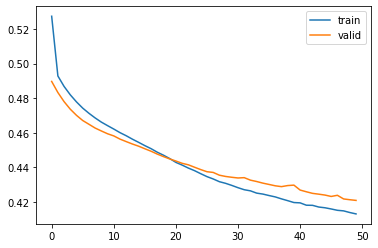

In [49]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test, y_test)

Loss is decreasing kind of similar way in train and valid. 

Let's set the threshold to 0.5 to start with and predict value of y. 

In [50]:
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

Let's create a function to make confusion matrix that can be used multiple times in this project later. 

In [51]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    
    if title:
        plt.title(title)

Plot the confusion matrix

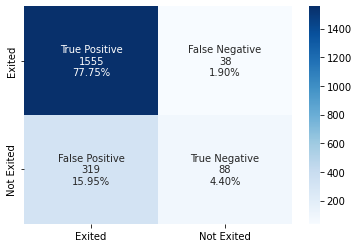

In [52]:
#Calculating the confusion matrix 
cm=confusion_matrix(y_test, y_pred)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Exited','Not Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Model predicted very low true negatives and high false positives. 

Lets check the scores by creating classification report. 

In [53]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1593
           1       0.70      0.22      0.33       407

    accuracy                           0.82      2000
   macro avg       0.76      0.60      0.61      2000
weighted avg       0.80      0.82      0.78      2000



The recall and f1-score are very low for class 1. 

Above one was very basic model. Now let's try various model improvement techniques and see what gives us the best score. 

## **Model Performance Improvement**

Let's use different techniques like different optimizers, weight initialization, batch normalization, dropout etc and create multiple models and compare their performances. 

The goal is to get high recall without compromising F-1 and/or precision. 

I am going to create few functions now that can be used while evaluating different models.

### **Common Functions**

Create a function to plot loss by epocs.

In [54]:
def epoch_loss(hist):
  #Plotting Train Loss vs Validation Loss
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

Create a function create ROC curve to find the optimum threshold.

In [55]:
def roc(model_name):
  # predict probabilities
  yhat1 = model_name.predict(X_test)
  # keep probabilities for the positive outcome only
  yhat1 = yhat1[:, 0]
  # calculate roc curves
  fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
  # calculate the g-mean for each threshold
  gmeans1 = np.sqrt(tpr * (1-fpr))
  # locate the index of the largest g-mean
  ix = np.argmax(gmeans1)
  print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
  # plot the roc curve for the model
  pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
  pyplot.plot(fpr, tpr, marker='.')
  pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
  # axis labels
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  pyplot.legend()
  # show the plot
  pyplot.show()
  return thresholds1[ix]

Create a function to plot the confusion matrix

In [56]:
def confusion_matrix_and_report(model_name,thresholds):
  y_pred_e1=model_name.predict(X_test)
  y_pred_e1 = (y_pred_e1 > thresholds)
  cm1=confusion_matrix(y_test, y_pred_e1)
  labels = ['True Positive','False Negative','False Positive','True Negative']
  categories = [ 'Exited','Not Exited']
  make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')
  return y_pred_e1


Create a function to create classification report

In [57]:
def acc_class_rep(y_prede_val):
  #Accuracy as per the classification report 
  cr=metrics.classification_report(y_test,y_prede_val)
  print(cr)

### **Perf Model 1 - More Hidden Layers**

As part of this model, will add more hidden layers with higher number of neurons. 

Let's start with setting the seed for random number generator to ensure the same output all the time. 

In [ ]:
backend.clear_session() # to clear model from memory
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

For this model, we will try with adding more hidden layers and 'he' as weight initialization. Also, for this model, will use Adam as optimizer with learning rate of 0.001. 

In [ ]:
model1 = Sequential()
#Adding the hidden and output layers
model1.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model1.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(1, activation = 'sigmoid'))
#Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
# check the summary
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3072      
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 46,337
Trainable params: 46,337
Non-trainable params: 0
_________________________________________________________________


Store the history of model by fitting it with validation split of 0.2 and run for 50 epochs and batch size of 64.

In [ ]:
history1 = model1.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 4ms/step - loss: 0.4562 - accuracy: 0.8034 - val_loss: 0.4608 - val_accuracy: 0.8112
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4244 - accuracy: 0.8230 - val_loss: 0.4220 - val_accuracy: 0.8181
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3851 - accuracy: 0.8359 - val_loss: 0.3683 - val_accuracy: 0.8600
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3613 - accuracy: 0.8512 - val_loss: 0.3596 - val_accuracy: 0.8525
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3523 - accuracy: 0.8520 - val_loss: 0.3362 - val_accuracy: 0.8625
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3501 - accuracy: 0.8559 - val_loss: 0.3403 - val_accuracy: 0.8594
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3412 - accuracy: 0.8572 - val_loss: 0.3523 - val_accuracy: 0.8575
Epoch 

Let's use a function to plot loss of train and validation by each epochs. 

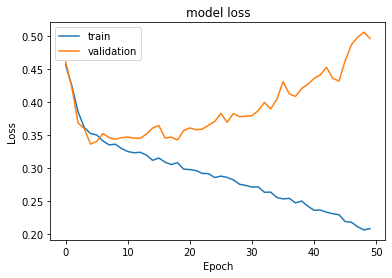

In [ ]:
epoch_loss(history1)

It doesn't look good, model overfits as training loss continued to go down but validation loss went up after few epochs. 

Let's plot AUC curve to find out the best threshold to choose. 

Best Threshold=0.172437, G-Mean=0.717


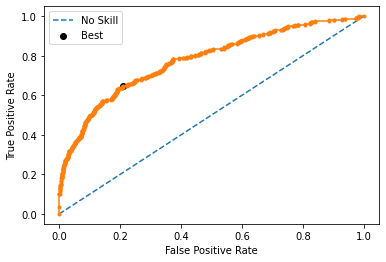

In [ ]:
thresholds1 = roc(model1)

Use the best threshold value to plot the confusion matrix. 

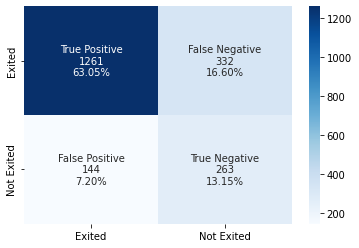

In [ ]:
y_prede_val1=confusion_matrix_and_report(model1,thresholds1)

Create classificaiton report to check all the scores.

In [ ]:
acc_class_rep(y_prede_val1)

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1593
           1       0.44      0.65      0.52       407

    accuracy                           0.76      2000
   macro avg       0.67      0.72      0.68      2000
weighted avg       0.80      0.76      0.78      2000



F-1 and recall scores have improved than basic model, but precision went down. 

### **Perf Model 2 - Batch Normalization**

As part of this model, will add batch normalization in couple of hidden layers. As the data is normalized already, will add it to the later hidden layers. 

Let's start with setting the seed for random number generator to ensure the same output all the time.

In [28]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

Next, let's build the model with batch normalization, 'he' as weight initialization and Adam as optimizer with learning rate of 0.001. 

In [29]:
model2 = Sequential()
model2.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
model2.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dense(1, activation = 'sigmoid'))
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 1)                 6

Store the history of model by fitting it with validation split of 0.2 and run for 50 epochs and batch size of 64.

In [30]:
history_2 = model2.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 2s 12ms/step - loss: 0.5545 - accuracy: 0.7345 - val_loss: 0.4870 - val_accuracy: 0.8000
Epoch 2/50
100/100 [==============================] - 1s 7ms/step - loss: 0.3998 - accuracy: 0.8375 - val_loss: 0.4704 - val_accuracy: 0.8000
Epoch 3/50
100/100 [==============================] - 1s 7ms/step - loss: 0.3764 - accuracy: 0.8411 - val_loss: 0.4403 - val_accuracy: 0.8069
Epoch 4/50
100/100 [==============================] - 1s 9ms/step - loss: 0.3639 - accuracy: 0.8491 - val_loss: 0.3960 - val_accuracy: 0.8250
Epoch 5/50
100/100 [==============================] - 1s 7ms/step - loss: 0.3506 - accuracy: 0.8500 - val_loss: 0.3537 - val_accuracy: 0.8556
Epoch 6/50
100/100 [==============================] - 1s 7ms/step - loss: 0.3451 - accuracy: 0.8589 - val_loss: 0.3479 - val_accuracy: 0.8581
Epoch 7/50
100/100 [==============================] - 1s 7ms/step - loss: 0.3439 - accuracy: 0.8548 - val_loss: 0.3555 - val_accuracy: 0.8475
Epoch

Let's use a function to plot loss of train and validation by each epochs.

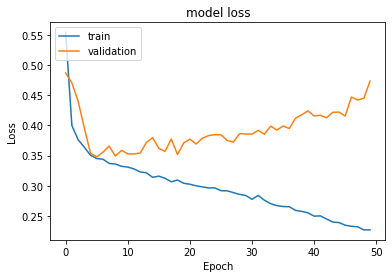

In [31]:
epoch_loss(history_2)

It doesn't look good either, model looks overfit. 

Let's plot AUC curve to find out the best threshold to choose.

Best Threshold=0.084241, G-Mean=0.717


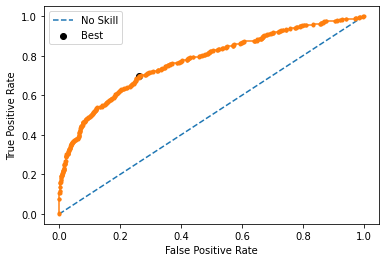

In [42]:
thresholds2 = roc(model2)

Use the best threshold value to plot the confusion matrix.

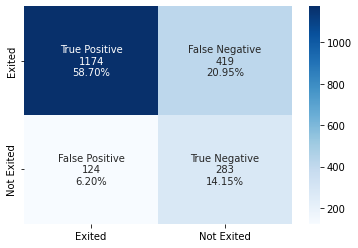

In [58]:
y_prede_val2=confusion_matrix_and_report(model2,thresholds2)

False negatives are too high.

Create classificaiton report to check all the scores.

In [59]:
acc_class_rep(y_prede_val2)

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1593
           1       0.40      0.70      0.51       407

    accuracy                           0.73      2000
   macro avg       0.65      0.72      0.66      2000
weighted avg       0.80      0.73      0.75      2000



F1-score and all other scores got bit reduced compare the first model. 

### **Perf Model 3 - Dropout**

As part of this model, will try dropout after hidden layers. I will choose 0.2 ratio for dropout. 

Let's start with setting the seed for random number generator to ensure the same output all the time.

In [32]:
backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

Next, let's build the model with dropout with 0.2 and Adam as optimizer with learning rate of 0.001. 

In [33]:
model3 = Sequential()
model3.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
model3.add(Dropout(0.2))
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(1, activation = 'sigmoid'))
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

Store the history of model by fitting it with validation split of 0.2 and run for 50 epochs and batch size of 64.

In [34]:
history_3 = model3.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 6ms/step - loss: 0.5004 - accuracy: 0.7892 - val_loss: 0.4526 - val_accuracy: 0.8000
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 0.4523 - accuracy: 0.8019 - val_loss: 0.4408 - val_accuracy: 0.8194
Epoch 3/50
100/100 [==============================] - 1s 8ms/step - loss: 0.4337 - accuracy: 0.8116 - val_loss: 0.4226 - val_accuracy: 0.8325
Epoch 4/50
100/100 [==============================] - 1s 8ms/step - loss: 0.4175 - accuracy: 0.8225 - val_loss: 0.3971 - val_accuracy: 0.8369
Epoch 5/50
100/100 [==============================] - 1s 8ms/step - loss: 0.4017 - accuracy: 0.8336 - val_loss: 0.3741 - val_accuracy: 0.8562
Epoch 6/50
100/100 [==============================] - 1s 7ms/step - loss: 0.3832 - accuracy: 0.8423 - val_loss: 0.3549 - val_accuracy: 0.8581
Epoch 7/50
100/100 [==============================] - 1s 7ms/step - loss: 0.3686 - accuracy: 0.8448 - val_loss: 0.3525 - val_accuracy: 0.8625
Epoch 

Let's use a function to plot loss of train and validation by each epochs.

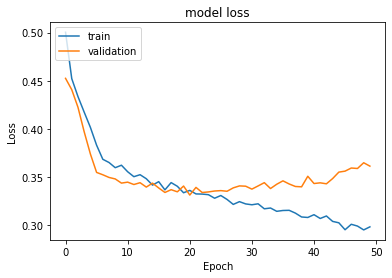

In [35]:
epoch_loss(history_3)

It looks better than earlier models. It started to bit overfit after 20 something echops. 

Let's plot AUC curve to find out the best threshold to choose.

Best Threshold=0.214856, G-Mean=0.757


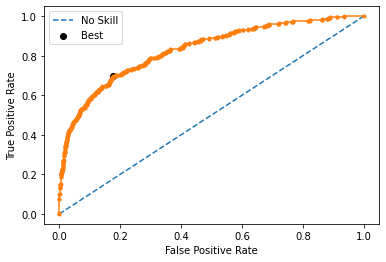

In [36]:
thresholds3 = roc(model3)

Use the best threshold value to plot the confusion matrix.


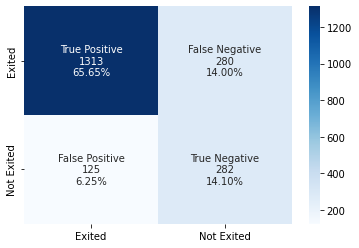

In [60]:
y_prede_val3=confusion_matrix_and_report(model3,thresholds3)

False negative and false positve reduced than earlier. 

Create classificaiton report to check all the scores.

In [61]:
acc_class_rep(y_prede_val3)

              precision    recall  f1-score   support

           0       0.91      0.82      0.87      1593
           1       0.50      0.69      0.58       407

    accuracy                           0.80      2000
   macro avg       0.71      0.76      0.72      2000
weighted avg       0.83      0.80      0.81      2000



Its getting better. This is the best F1 score that we have seen so far. 

### **Perf Model 4 - RandomSearchCV for Batch Size and LR**

As part of this model, will use RandomSearchCV to find out the best batch size and learning rate value.

Let's start with setting the seed for random number generator to ensure the same output all the time.

In [62]:
backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

Crate a function to build a model with droput of ratio 0.3 after each hidden layer. We will use Adam as optimizer. 

In [63]:
def create_model_v4(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

Use RandomSearchCV on multiple values of batch size and learning rate to find the best combination. 

In [64]:
keras_estimator = KerasClassifier(build_fn=create_model_v4, verbose=1)
# define the random search parameters
param_random = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
random= RandomizedSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_distributions=param_random,n_jobs=-1)

Fit the RandomSearchCV into model

In [66]:
random_result = random.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
200/200 [==============================] - 1s 5ms/step - loss: 0.4805 - accuracy: 0.7948 - val_loss: 0.4664 - val_accuracy: 0.8000
Best: 0.796250 using {'lr': 0.01, 'batch_size': 32}


Best learning rate is 0.01 and batch size = 32. Let's use that to compile the model. 

In [67]:
model4=create_model_v4(batch_size=random_result.best_params_['batch_size'],lr=random_result.best_params_['lr'])
optimizer = tf.keras.optimizers.Adam(random_result.best_params_['lr'])
model4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
model4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3072      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 64)               

Store the history of model by fitting it with validation split of 0.2 and run for 50 epochs and batch size of 32.

In [68]:
history_4=model4.fit(X_train, y_train, epochs=50, batch_size = 32, verbose=1,validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 2s 7ms/step - loss: 0.4841 - accuracy: 0.7947 - val_loss: 0.4451 - val_accuracy: 0.8019
Epoch 2/50
200/200 [==============================] - 1s 5ms/step - loss: 0.4414 - accuracy: 0.8112 - val_loss: 0.4193 - val_accuracy: 0.8056
Epoch 3/50
200/200 [==============================] - 1s 6ms/step - loss: 0.4223 - accuracy: 0.8170 - val_loss: 0.3754 - val_accuracy: 0.8550
Epoch 4/50
200/200 [==============================] - 1s 6ms/step - loss: 0.4076 - accuracy: 0.8264 - val_loss: 0.3708 - val_accuracy: 0.8512
Epoch 5/50
200/200 [==============================] - 1s 5ms/step - loss: 0.4042 - accuracy: 0.8336 - val_loss: 0.3514 - val_accuracy: 0.8569
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3898 - accuracy: 0.8367 - val_loss: 0.3596 - val_accuracy: 0.8631
Epoch 7/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3973 - accuracy: 0.8384 - val_loss: 0.3617 - val_accuracy: 0.8706
Epoch 

Let's use a function to plot loss of train and validation by each epochs.

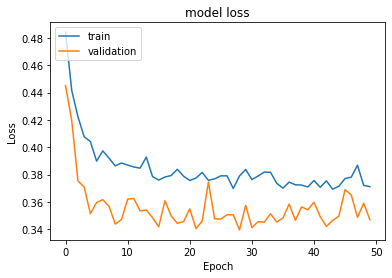

In [69]:
epoch_loss(history_4)

It looks better. Validation shows lesser loss compare to training data. 

Let's plot AUC curve to find out the best threshold to choose.

Best Threshold=0.190691, G-Mean=0.779


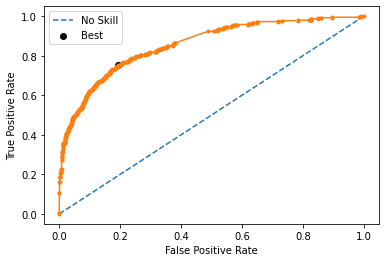

In [70]:
thresholds4 = roc(model4)

Use the best threshold value to plot the confusion matrix.

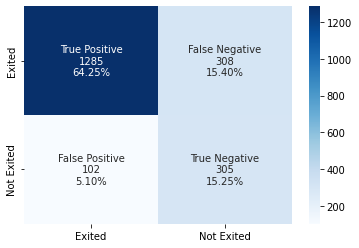

In [71]:
y_prede_val4=confusion_matrix_and_report(model4,thresholds4)

Create classificaiton report to check all the scores.

In [72]:
acc_class_rep(y_prede_val4)

              precision    recall  f1-score   support

           0       0.93      0.81      0.86      1593
           1       0.50      0.75      0.60       407

    accuracy                           0.80      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.80      0.81      2000



All scores improved by a bit including f-1.

### **Perf Model 5 - GridSearchCV for Batch Size and LR**

As part of this model, will use GridSearchCV to find out the best batch size and learning rate value.

Let's start with setting the seed for random number generator to ensure the same output all the time.

In [73]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

Crate a function to build a model with droput of ratio 0.3 after each hidden layer. We will use Adam as optimizer.

In [74]:
def create_model_v5(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

Use GridSearchCV on multiple values of batch size and learning rate to find the best combination. 

In [75]:
keras_estimator = KerasClassifier(build_fn=create_model_v5, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

Fit the GridSearchCV

In [76]:
import time
  
# store starting time
begin = time.time()


grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
200/200 [==============================] - 1s 4ms/step - loss: 0.4794 - accuracy: 0.7959 - val_loss: 0.4523 - val_accuracy: 0.8000
Best: 0.796375 using {'batch_size': 32, 'lr': 0.01}
Total runtime of the program is 40.89323711395264


Like RandomSearch, GridSearch also gave the batch size of 32 and learning rate as 0.01. Let's use that to compile the model.

In [77]:
model5=create_model_v5(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
model5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
model5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3072      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

Store the history of model by fitting it with validation split of 0.2 and run for 50 epochs and batch size of 32.

In [78]:
history_5=model5.fit(X_train, y_train, epochs=50, batch_size = 32, verbose=1,validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 2s 7ms/step - loss: 0.4793 - accuracy: 0.7966 - val_loss: 0.4485 - val_accuracy: 0.8000
Epoch 2/50
200/200 [==============================] - 1s 6ms/step - loss: 0.4345 - accuracy: 0.8116 - val_loss: 0.3903 - val_accuracy: 0.8519
Epoch 3/50
200/200 [==============================] - 1s 6ms/step - loss: 0.4146 - accuracy: 0.8220 - val_loss: 0.3618 - val_accuracy: 0.8556
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4082 - accuracy: 0.8258 - val_loss: 0.3691 - val_accuracy: 0.8619
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4026 - accuracy: 0.8356 - val_loss: 0.3591 - val_accuracy: 0.8587
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3908 - accuracy: 0.8386 - val_loss: 0.3661 - val_accuracy: 0.8619
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3929 - accuracy: 0.8373 - val_loss: 0.3673 - val_accuracy: 0.8450
Epoch 

Let's use a function to plot loss of train and validation by each epochs.

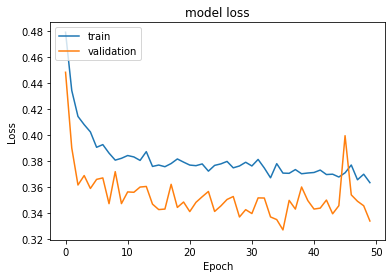

In [79]:
epoch_loss(history_5)

Same like above model, validation did better than training data. 

Let's plot AUC curve to find out the best threshold to choose.

Best Threshold=0.186389, G-Mean=0.778


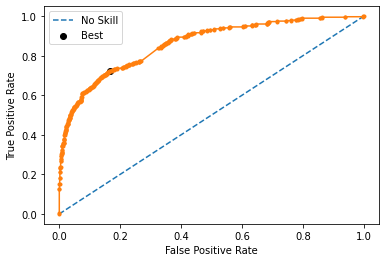

In [80]:
thresholds5 = roc(model5)

Use the best threshold value to plot the confusion matrix.

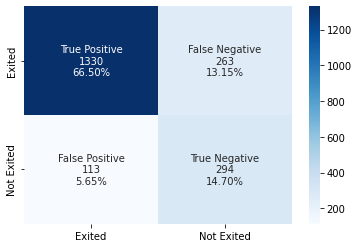

In [81]:
y_prede_val5=confusion_matrix_and_report(model5,thresholds5)

Little better than RandomSearchCV.

Create classificaiton report to check all the scores.

In [82]:
acc_class_rep(y_prede_val5)

              precision    recall  f1-score   support

           0       0.92      0.83      0.88      1593
           1       0.53      0.72      0.61       407

    accuracy                           0.81      2000
   macro avg       0.72      0.78      0.74      2000
weighted avg       0.84      0.81      0.82      2000



Again the scores got improved a bit compare to previous models. 

### **Perf Model 6 - Keras Tuner**

As part of this model, will use Keras Tuner to find out the best number of layers, best number of nuerons in layers and learning rate value.

First let's install the keras-tuner.

In [83]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 4.2 MB/s 


Import required library from kerastuner.tuners

In [84]:
from kerastuner.tuners import RandomSearch

Let's set the seed for random number generator to ensure the same output all the time.

In [85]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

Create a function to build model with different range of values for number of layers (2-9), number of nuerons (32-256 with increment of 32) and learning rate (1e-2 to 1e-4)

In [86]:
def build_model(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

Use randomsearch to over different combinations.

In [87]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
     project_name='Job_')

In [89]:
#print the summary
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


Search the best model by running 5 trials. 

In [90]:
### Searching the best model on X and y train
tuner.search(X_train, y_train,
             epochs=5,
             validation_split = 0.2)

Trial 5 Complete [00h 00m 33s]
val_accuracy: 0.8383333285649618

Best val_accuracy So Far: 0.8699999849001566
Total elapsed time: 00h 01m 59s


In [91]:
## Printing the best models with their hyperparameters
tuner.results_summary()

Results summary
Results in ./Job_
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 64
units_4: 192
units_5: 32
units_6: 224
units_7: 96
units_8: 192
Score: 0.8699999849001566
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.8691666523615519
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 224
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.8674999872843424
Trial summary
Hyperparameters:
num_layers: 9
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160
units_4: 160
units_5: 192
units_6: 96
units_7: 128
units_8: 96
Score: 0.8383333285649618
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 32
uni

From above top 5 results, I am going to choose first one to make the model. It has num_layers as 5 with below number of nuerons in each hidden layers.

First: 160

Second: 160

Third: 224

Forth: 128

Fifth: 224

And the learning_rate would be 0.001

Let's set the seed for random number generator to ensure the same output all the time.

In [92]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

Create a model with layers, number of nuerons and learning rate as found above and with 'he' as weight initialization.

In [93]:
model6 = Sequential()
model6.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model6.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model6.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model6.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model6.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model6.add(Dense(1, activation = 'sigmoid'))

optimizer = tf.keras.optimizers.Adam(0.001)
model6.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
model6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1920      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 224)               28896     
                                                                 
 dense_5 (Dense)             (None, 1)                 225       
                                                                 
Total params: 121,665
Trainable params: 121,665
Non-trai

Store the history of model by fitting it with validation split of 0.2 and run for 50 epochs and batch size of 64.

In [94]:
history_6 = model6.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 4s 17ms/step - loss: 0.4646 - accuracy: 0.8017 - val_loss: 0.4687 - val_accuracy: 0.8056
Epoch 2/50
100/100 [==============================] - 1s 10ms/step - loss: 0.4204 - accuracy: 0.8206 - val_loss: 0.4089 - val_accuracy: 0.8300
Epoch 3/50
100/100 [==============================] - 1s 9ms/step - loss: 0.3817 - accuracy: 0.8380 - val_loss: 0.3753 - val_accuracy: 0.8575
Epoch 4/50
100/100 [==============================] - 1s 10ms/step - loss: 0.3651 - accuracy: 0.8494 - val_loss: 0.3622 - val_accuracy: 0.8544
Epoch 5/50
100/100 [==============================] - 1s 9ms/step - loss: 0.3543 - accuracy: 0.8509 - val_loss: 0.3382 - val_accuracy: 0.8600
Epoch 6/50
100/100 [==============================] - 1s 10ms/step - loss: 0.3469 - accuracy: 0.8566 - val_loss: 0.3420 - val_accuracy: 0.8581
Epoch 7/50
100/100 [==============================] - 1s 9ms/step - loss: 0.3376 - accuracy: 0.8573 - val_loss: 0.3517 - val_accuracy: 0.8575
Ep

Let's use a function to plot loss of train and validation by each epochs.


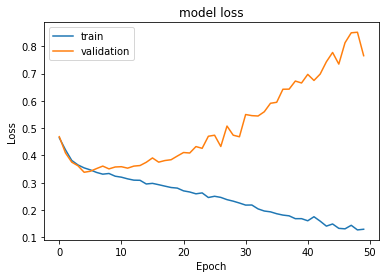

In [95]:
epoch_loss(history_6)

It doesn't look good. Model looks overfit. 

Let's plot AUC curve to find out the best threshold to choose.

Best Threshold=0.052942, G-Mean=0.704


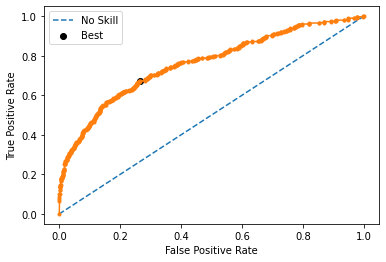

In [96]:
thresholds6 = roc(model6)

Use the best threshold value to plot the confusion matrix.

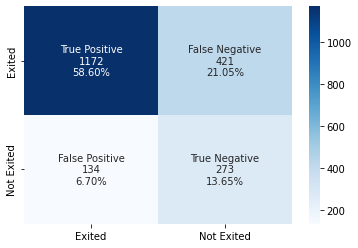

In [97]:
y_prede_val6=confusion_matrix_and_report(model6,thresholds6)

Create classificaiton report to check all the scores.

In [98]:
acc_class_rep(y_prede_val6)

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1593
           1       0.39      0.67      0.50       407

    accuracy                           0.72      2000
   macro avg       0.65      0.70      0.65      2000
weighted avg       0.79      0.72      0.74      2000



F-1 score reduced than earlier models. Tuning of hyperparameters didn't help. 

### **Perf Model 7 - SMOTE + Keras Tuner**

As we observed that the dataset is not balanced. It has 80-20 ratio. As part of this model, will use SMOTE to resample and use Keras Tuner to find out the best number of layers, best number of nuerons in layers and learning rate value.

In [99]:
##Applying SMOTE on train and test
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)

Let's set the seed for random number generator to ensure the same output all the time.

In [100]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

Create a function to build model with different range of values for number of layers (2-9), number of nuerons (32-256 with increment of 32) and learning rate (1e-2 to 1e-4)


In [101]:
def build_model_2(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

Use randomsearch to over different combinations.

In [102]:
tuner_2 = RandomSearch(
    build_model_2,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    project_name='Job_Switch')

In [103]:
# print search space summary
tuner_2.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


Search the best model by running 5 trials.

In [104]:
tuner_2.search(X_sm, y_sm,
             epochs=5,
             validation_split = 0.2)

Trial 5 Complete [00h 00m 32s]
val_accuracy: 0.6720303495724996

Best val_accuracy So Far: 0.7375719348589579
Total elapsed time: 00h 02m 39s


In [105]:
## Printing the best models with their hyperparameters
tuner_2.results_summary()

Results summary
Results in ./Job_Switch
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 64
units_4: 192
units_5: 32
units_6: 224
units_7: 96
units_8: 192
Score: 0.7375719348589579
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 224
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.7337781190872192
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.7112768093744913
Trial summary
Hyperparameters:
num_layers: 9
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160
units_4: 160
units_5: 192
units_6: 96
units_7: 128
units_8: 96
Score: 0.6720303495724996
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 

From above top 5 results, I am going to choose first one to make the model. It has num_layers as 5 with below number of nuerons in each hidden layers.

First: 160

Second: 64

Third: 160

Forth: 64

Fifth: 192

And the learning_rate would be 0.001

Let's set the seed for random number generator to ensure the same output all the time.

In [106]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

Create a model with layers, number of nuerons and learning rate as found above and with 'he' as weight initialization.

In [107]:
model7 = Sequential()
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model7.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(192,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1920      
                                                                 
 dense_1 (Dense)             (None, 64)                10304     
                                                                 
 dense_2 (Dense)             (None, 160)               10400     
                                                                 
 dense_3 (Dense)             (None, 64)                10304     
                                                                 
 dense_4 (Dense)             (None, 192)               12480     
                                                                 
 dense_5 (Dense)             (None, 1)                 193       
                                                                 
Total params: 45,601
Trainable params: 45,601
Non-traina

Store the history of model by fitting it with validation split of 0.2 and run for 50 epochs and batch size of 64.

In [108]:
history_7 = model7.fit(X_sm,y_sm,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
160/160 [==============================] - 1s 5ms/step - loss: 0.5619 - accuracy: 0.7128 - val_loss: 0.5794 - val_accuracy: 0.6876
Epoch 2/50
160/160 [==============================] - 1s 4ms/step - loss: 0.4840 - accuracy: 0.7682 - val_loss: 1.1938 - val_accuracy: 0.3677
Epoch 3/50
160/160 [==============================] - 1s 4ms/step - loss: 0.4556 - accuracy: 0.7857 - val_loss: 0.6316 - val_accuracy: 0.6668
Epoch 4/50
160/160 [==============================] - 1s 4ms/step - loss: 0.4283 - accuracy: 0.8019 - val_loss: 0.6385 - val_accuracy: 0.6672
Epoch 5/50
160/160 [==============================] - 1s 4ms/step - loss: 0.4134 - accuracy: 0.8066 - val_loss: 0.6582 - val_accuracy: 0.6413
Epoch 6/50
160/160 [==============================] - 1s 4ms/step - loss: 0.4072 - accuracy: 0.8141 - val_loss: 0.5029 - val_accuracy: 0.7500
Epoch 7/50
160/160 [==============================] - 1s 4ms/step - loss: 0.4001 - accuracy: 0.8175 - val_loss: 0.6183 - val_accuracy: 0.6766
Epoch 

Let's use a function to plot loss of train and validation by each epochs.

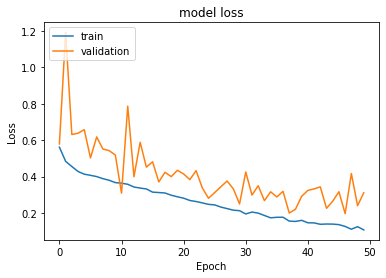

In [109]:
epoch_loss(history_7)

It looks better than previous model, still not great. 

Let's plot AUC curve to find out the best threshold to choose.

Best Threshold=0.023695, G-Mean=0.714


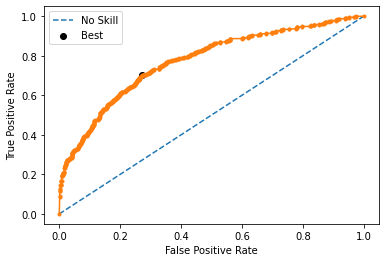

In [110]:
thresholds7 = roc(model7)

Use the best threshold value to plot the confusion matrix.

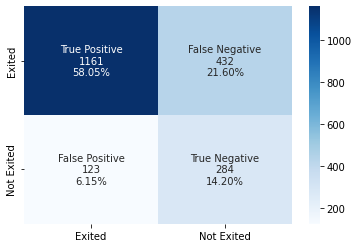

In [111]:
y_prede_val7=confusion_matrix_and_report(model7,thresholds7)

False negatives are still high. True values are under 75%. 

Create classificaiton report to check all the scores.

In [112]:
acc_class_rep(y_prede_val7)

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1593
           1       0.40      0.70      0.51       407

    accuracy                           0.72      2000
   macro avg       0.65      0.71      0.66      2000
weighted avg       0.80      0.72      0.75      2000



The results are similar to Keras tuner with slight improvement in f1 score. 

### **Perf Model 8 - SMOTE + Keras Tuner + GridSearchCV**

In this model, like above will try SMOTE because of inbalanced data and use Keras Tuner for hyperparameter turning but will use GridSearchCV to find the best combinations. 

Let's start with setting the seed for random number generator to ensure the same output all the time.

In [113]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

Create a function to build the model with droput of ratio 0.3 after each hidden layer. We will use Adam as optimizer.

In [114]:
def create_model_v8(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

Use keras classifier and feed the above model

In [115]:
keras_estimator = KerasClassifier(build_fn=create_model_v8, verbose=1)

Use GridSearchCV to find the best combination of batch size and learning rate. 

In [116]:
# define the grid search parameters
param_grid = {
    'batch_size':[32, 64, 128],
    "lr":[0.001,0.01,0.1],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)
grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
200/200 [==============================] - 1s 4ms/step - loss: 0.4773 - accuracy: 0.7922 - val_loss: 0.4748 - val_accuracy: 0.8000


In [117]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.800749 using {'batch_size': 32, 'lr': 0.01}


Create a model with best parameters found earlier.

In [118]:
model8=create_model_v8(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
model8.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
model8.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3072      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

Store the history of model by fitting it with validation split of 0.2 and run for 50 epochs and batch size of 64.

In [119]:
history_8=model8.fit(X_sm, y_sm, epochs=50, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_split=0.2)

Epoch 1/50
319/319 [==============================] - 2s 4ms/step - loss: 0.5806 - accuracy: 0.6926 - val_loss: 0.4708 - val_accuracy: 0.8226
Epoch 2/50
319/319 [==============================] - 1s 4ms/step - loss: 0.5163 - accuracy: 0.7483 - val_loss: 0.9619 - val_accuracy: 0.4203
Epoch 3/50
319/319 [==============================] - 1s 3ms/step - loss: 0.4909 - accuracy: 0.7650 - val_loss: 0.6048 - val_accuracy: 0.6754
Epoch 4/50
319/319 [==============================] - 1s 5ms/step - loss: 0.4822 - accuracy: 0.7710 - val_loss: 0.6812 - val_accuracy: 0.6456
Epoch 5/50
319/319 [==============================] - 2s 6ms/step - loss: 0.4761 - accuracy: 0.7737 - val_loss: 0.6281 - val_accuracy: 0.6272
Epoch 6/50
319/319 [==============================] - 2s 5ms/step - loss: 0.4779 - accuracy: 0.7746 - val_loss: 0.5739 - val_accuracy: 0.6546
Epoch 7/50
319/319 [==============================] - 2s 5ms/step - loss: 0.4747 - accuracy: 0.7743 - val_loss: 0.8907 - val_accuracy: 0.5432
Epoch 

Let's use a function to plot loss of train and validation by each epochs.

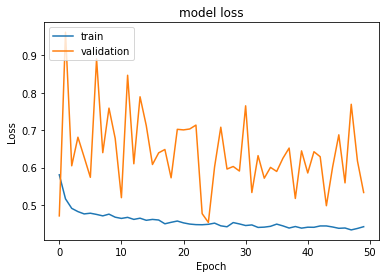

In [120]:
epoch_loss(history_8)

It doesn't look good, model looks overfit.

Let's plot AUC curve to find out the best threshold to choose.

Best Threshold=0.455843, G-Mean=0.771


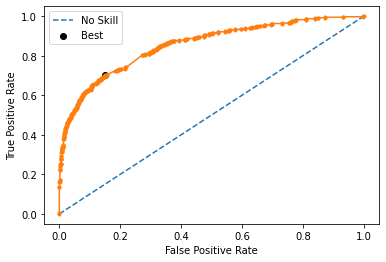

In [121]:
thresholds8 = roc(model8)

Use the best threshold value to plot the confusion matrix.

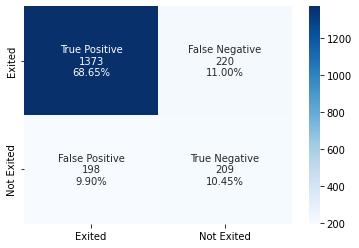

In [122]:
y_prede_val8=confusion_matrix_and_report(model7,thresholds8)

False negatives and false positive are much lesser than before. 

Create classificaiton report to check all the scores.

In [123]:
acc_class_rep(y_prede_val8)

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1593
           1       0.49      0.51      0.50       407

    accuracy                           0.79      2000
   macro avg       0.68      0.69      0.68      2000
weighted avg       0.80      0.79      0.79      2000



Got very similar results compare to other keras tuner models. Oversampling with SMOTE didn't really help to get better results. 

# **6. Model Comparison**

As part of this project, after creating a basic neural network, we tried 8 different ways to compare the performance of each model. 


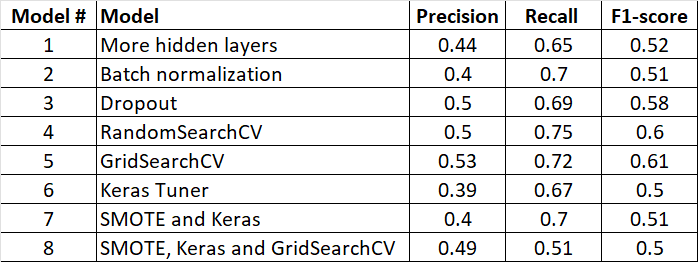


By looking at the f1-scores as primary and other metrics like recall as secondary, model # 4 and # 5 performed the best. 

Model number 4 was about using RandomSearchCV and number 5 was about using  GridSearchCV to find batch size and learning rate and add dropouts after hidden layers. It gave the best f1 score around 0.6 and recall around 0.75. It got accuracy of ~0.81 which was higher compare to other models too.

# **7. Conclusion and Key Takeaways**

As part of this project, we have analyzed the customer data of a bank who wants figure out the customers who would like to get churn in near future and want to improve their services so they can stop them. 

To achieve the goal, we tried different neural networks based on different kind of optimizaiton and regularization techniques and determine the best model. 

While doing EDA and other part of the project, few key takeaways for the bank can be mentioned - 


*   The older customers tend to leave bank more frequently than younger. Bank needs 
to improve their services that can benefit their older customers, may be older customers like to do the banking old ways and not much comfortable with new technologies, so continue old methods or improve it. 

*   Customers from Germany tend to leave more, may be bank look the branch over there or try to lure the customers by providing Germany specific benefits. 


*   Customers with higher number of products, especially 4 and then 3, bank should really take good care of them as they leave the most. Bank should spend time understanding that why customer churn after using these many products. Ideally it should be other way around as it's hard to leave the eco systems. So bank needs to do more research on that. 

*   When customers are inactive, they likely to churn more. So when bank sees customers not being active, their marketing team should start sending them offers or something to make them active so they do not churn. 


*   More female customers churn bank compare to male, bank should look into that as well. 

The different kinds of neural networks gave the best recall of 0.75 which means, bank can predict 75% of the time a customer would churn. It is a good number, however, I still feel that it could be better by trying more features and/or adding more data or may be trying different algorithms to make the recall and f1 score high. 



